<a href="https://colab.research.google.com/github/chyaswanth-2002/Diabetes-prediction-ML/blob/main/Car_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [8]:
cars_data= pd.read_csv('/content/cars.csv')

In [9]:
cars_data.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [10]:
cars_data.shape


(963, 6)

In [11]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [12]:
cars_data.describe()

,age,gender,miles,debt,income,sales
count,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,37.971963,0.512980,27.704050,14109.004154,6176.047767,11689.860852
std,12.290838,0.500091,13.378181,18273.702481,3260.670142,8986.896921
min,19.000000,0.000000,10.000000,0.000000,0.000000,500.000000
25%,27.000000,0.000000,20.000000,1475.000000,3506.500000,3554.000000
50%,37.000000,1.000000,25.000000,6236.000000,6360.000000,9130.000000
75%,49.000000,1.000000,32.000000,16686.000000,8649.500000,19245.000000
max,60.000000,1.000000,97.000000,59770.000000,11970.000000,29926.000000


In [13]:
cars_data.isnull().sum()


age       0
gender    0
miles     0
debt      0
income    0
sales     0
dtype: int64

In [14]:
print(cars_data.gender.value_counts())

gender
1    494
0    469
Name: count, dtype: int64


In [15]:
cars_data.groupby('sales').mean()

,age,gender,miles,debt,income
sales,,,,,
500,39.0,1.0,28.0,0.0,3282.0
505,27.0,1.0,15.0,0.0,1696.0
513,22.0,0.0,27.0,1885.0,1375.0
549,27.0,1.0,20.0,0.0,1751.0
576,29.0,1.0,17.0,0.0,4443.0
...,...,...,...,...,...
29715,59.0,1.0,89.0,51363.0,9491.0
29770,28.0,0.0,79.0,43266.0,7995.0
29828,40.0,0.0,62.0,42341.0,7395.0


In [18]:
X = cars_data.drop(columns='sales',axis=1)
Y = cars_data['sales']
print(X)
print(Y)

     age  gender  miles   debt  income
0     28       0     23      0    4099
1     26       0     27      0    2677
2     30       1     58  41576    6215
3     26       1     25  43172    7626
4     20       1     17   6979    8071
..   ...     ...    ...    ...     ...
958   22       0     11   8778    9829
959   19       1     23   4850    3470
960   28       1     28   9312    2720
961   50       0     29  51343    8713
962   47       1     15   3735    6406

[963 rows x 5 columns]
0        620
1       1792
2      27754
3      28256
4       4438
       ...  
958     1593
959     4742
960    12771
961    28511
962     6104
Name: sales, Length: 963, dtype: int64


In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2 ,random_state=2)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(963, 5) (770, 5) (193, 5)


In [31]:
a=LinearRegression()

In [32]:
a.fit(X_train,Y_train)

LinearRegression()

In [24]:
training_data_prediction=lin_reg_model.predict(X_train)

In [25]:
error_score=metrics.r2_score(Y_train,training_data_prediction)


In [26]:
print("R squared error:",error_score)

R squared error: 0.8318580335205934


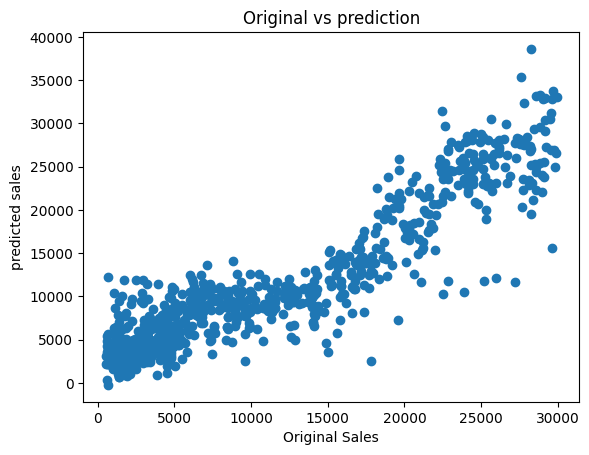

In [27]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Original Sales')
plt.ylabel('predicted sales')
plt.title('Original vs prediction')
plt.show()


In [33]:
b=a.predict(X_test)

In [34]:
error_score=metrics.r2_score(Y_test,b)
print("R squared error:",error_score)


R squared error: 0.8052656741063235


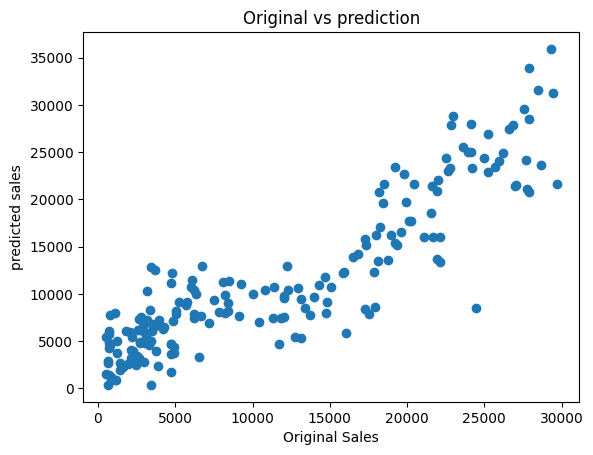

In [35]:
plt.scatter(Y_test,b)
plt.xlabel('Original Sales')
plt.ylabel('predicted sales')
plt.title('Original vs prediction')
plt.show()


In [36]:
c=Lasso()


In [37]:
c.fit(X_train,Y_train)

Lasso()

In [39]:
training_data_prediction=c.predict(X_train)

In [40]:
error_score=metrics.r2_score(Y_train,training_data_prediction)


In [41]:
print("R squared error:",error_score)

R squared error: 0.8318579834322173


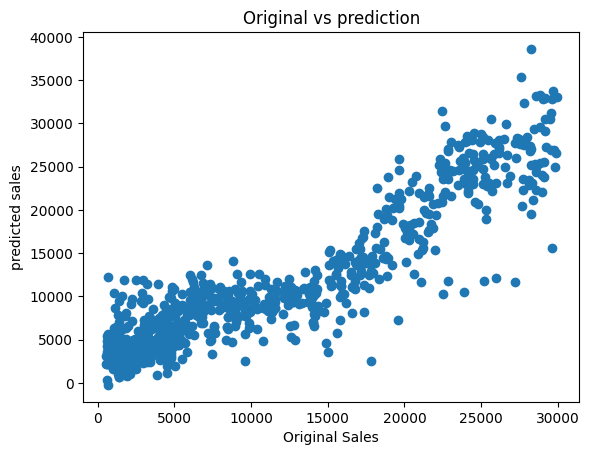

In [42]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Original Sales')
plt.ylabel('predicted sales')
plt.title('Original vs prediction')
plt.show()


In [48]:
s=c.predict(X_test)

In [47]:
error_score=metrics.r2_score(Y_test,s)
print("R squared error:",error_score)


R squared error: 0.8052915972642423


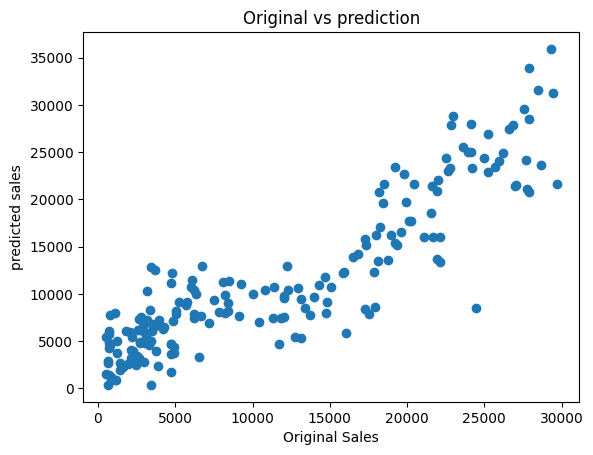

In [49]:
plt.scatter(Y_test,b)
plt.xlabel('Original Sales')
plt.ylabel('predicted sales')
plt.title('Original vs prediction')
plt.show()
